<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="4"> DSO 545- Exam 1 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2021 </b> </p>
<p style="text-align: center;"> <b> <span style="color:firebrick"> Date: </span> Friday Oct 22, 2021 </b> </p>
<p style="text-align: center;"> <b> <span style="color:firebrick"> Time period: </span> 8:00am-10:00am PDT </b> </p>

<p style="text-align: center;"> <span style="color:firebrick"> <font size="2"> <b> As a Marshall student I declare that I have prepared for this exam within the guidelines given by the professor and with respect to the Honor Code.  I certify that I have not used any unauthorized material during this examination and that the work presented here is entirely my own.</b> </font> </p> </span> 

<p style="text-align: center;"> <span style="color:firebrick"> <font size="2"> <b>Type down your name below to indicate that you will uphold this commitment to integrity:</b> </font> </p> </span> 




# First, Last Name: Falak Jain

# Exam Policies (please read carefully)

- This exam is closed book (you can only use a "cheat-sheet")
- Download the data file 'bitcoin.csv' from blackboard
- You are not allowed to discuss with anyone about this exam during the exam period
- During the exam period, you can use your computer to access your Python IDE and Blackboard only
- The exam period is **120** minutes
- Please respect the honor code. **Poor scores can be overcome, but cheating will be dealt with harshly!**



# <span style="color:black"> Case Study: </span>  <span style="color:firebrick"> Is Bitcoin history repeating? </span>

Bitcoin (<span>&#x20BF;</span>) is a cryptocurrency invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto. Bitcoin is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. Transactions are verified by miners through cryptography and recorded in a public distributed ledger called blockchain [Source: Wikipedia](https://en.wikipedia.org/wiki/Bitcoin#Mining).

The miners who verify the transactions on the bitcoin network are automatically rewarded with bitcoins(that's how bitcoins are created). The amount of bitcoin reward changes overtime. In particular, every 4 years the reward is halved. 

Initially, when Bitcoin was created, the reward was 50 Bitcoins to the miners for verifying a block of tranactions on the Bitcoin's blockchain. The following table shows the reward amount every four years:

| Halving Event | Date | Reward Amount|
|---------|------|--------|
| First   | 2012 | 25 bitcoins |
| Second  | 2016 | 12.5 bitcoins |
| Third   | 2020 | 6.25 bitcoins|

In this case study, we are going to explore how the price of bitcoin moves *before* and *after* the halving event happens. In the past, we have seen that the price of bitcoin trended upwards for a long time during the periods in which the halving events occured. The time periods in which the bitcoin price is in an upward trend for long time are called "Bull Runs".  Bull runs are exciting for investors who hold the bitcoin because that means their return on investment is higher. 


**Warning: The cryptocurrency market is volatile. Please do not mistake this exam case study for an investment advice.**



### <span style="color:firebrick"> Data </span>

The `bitcoin.csv` data file could be downloaded from USC Blackboard. The dataset records the price of bitcoin from Jan 1, 2011 until Oct 21, 2021.

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`date` | date range from Jan-1-2011 to Oct-21-2021
|`price`| daily price of bitcoin


### <span style="color:firebrick"> Questions </span>

#### 0. `(no points)` Run the following code to read data and load necessary packages

In [23]:
# import all necessary python packages here
# for data structures and manipulation

import numpy as np # for mathematical caluclations
import pandas as pd 
import datetime  # to access datetime

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')

In [24]:
# read the data here, and save it in a dataframe called 'bitcoin'
bitcoin = pd.read_csv('bitcoin.csv', parse_dates=['date'], index_col= 'date')
bitcoin

,price
date,
2011-01-01,0.3
2011-01-02,0.3
2011-01-03,0.3
2011-01-04,0.3
2011-01-05,0.3
...,...
2021-10-15,60892.2
2021-10-16,61553.6
2021-10-17,62026.1


#### 1. `(10 points)` Using either `seaborn` or `plotly`, create a line chart that shows bitcoin's price over time. Make sure to label the graph with an appropriate title, x-axis label, and y-axis label.

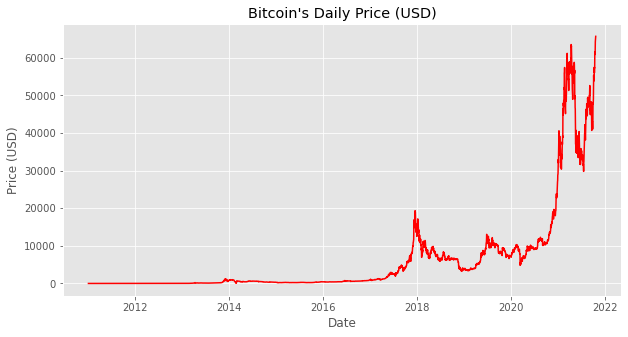

In [25]:
plt.figure(figsize = (10,5))
sns.lineplot(data = bitcoin, 
             x = 'date', 
             y = 'price',
             color = 'red')
plt.xlabel('Date')
plt.ylabel("Price (USD)")
plt.title("Bitcoin's Daily Price (USD)")
plt.show()

#### 2. `(10 points)` Extract the following features and add them to the bitcoin dataframe: `year`, `month`, `day`, `dayofweek`.

In [26]:
# feature extraction
bitcoin = bitcoin.reset_index()
bitcoin['Year'] = bitcoin.date.dt.year
bitcoin['Month'] = bitcoin.date.dt.month
bitcoin['Day'] = bitcoin.date.dt.day
bitcoin['Dayofweek'] = bitcoin.date.dt.dayofweek
bitcoin = bitcoin.set_index('date')
bitcoin.head()


,price,Year,Month,Day,Dayofweek
date,,,,,
2011-01-01,0.3,2011,1,1,5
2011-01-02,0.3,2011,1,2,6
2011-01-03,0.3,2011,1,3,0
2011-01-04,0.3,2011,1,4,1
2011-01-05,0.3,2011,1,5,2


#### 3. `(10 points)` Using `seaborn` or `plotly`, create a barchart that shows the yearly average price of bitcoin for each year from 2011 to 2021. Make sure to label the graph with an appropriate title, x-axis label, and y-axis label.

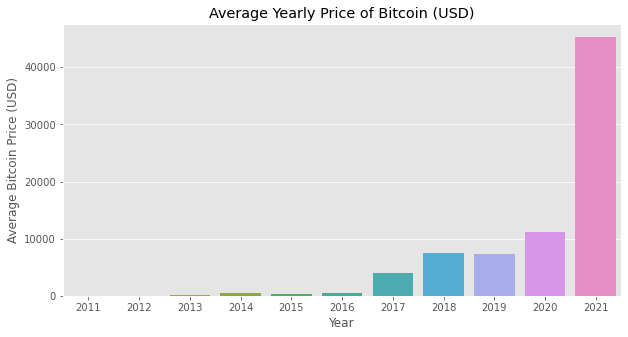

In [27]:
# aggregate the price of bitcoin by year
plt.figure(figsize = (10,5))
yearly_avg = pd.DataFrame(bitcoin.groupby('Year')['price'].mean())
yearly_avg = yearly_avg.reset_index()
sns.barplot(data=yearly_avg,x='Year',y='price')
plt.xlabel('Year')
plt.ylabel('Average Bitcoin Price (USD)')
plt.title('Average Yearly Price of Bitcoin (USD)')
plt.show()

#### 4. `(10 points)` In the past, the bitcoin bull runs occured in the periods listed in the table below:


| **Bull Runs**| Start date | End date |
|---------|------------|------------|
| First   | 2011-11-16 | 2013-11-27 | 
| Second  | 2015-01-10 | 2017-12-09 | 
| Third   | 2018-12-17 | Still going | 

Create three three dataframes, each representing the three bullmarkets we have so far. Name these dataframes as follows: `bull1`, `bull2`, `bull3`.


In [28]:
# run this code to create dates representing the start and end of each bull run

# first bull run
bull1_start = pd.to_datetime('2011-11-16')
bull1_end = pd.to_datetime('2013-11-27')

# second bull run
bull2_start = pd.to_datetime('2015-01-10')
bull2_end = pd.to_datetime('2017-12-09')

# third bull run
bull3_start = pd.to_datetime('2018-12-17')
bull3_end = pd.to_datetime('2021-10-21') # note that the bull run might be still 
                                         # going, but you can use '2021-10-21' to 
                                         # represent the last observation in the 
                                         # third bull market dataframe  


In [29]:
# first bull run 
bull1 = bitcoin[(bitcoin.index>=bull1_start) & (bitcoin.index<=bull1_end)]

# second bull run 
bull2 = bitcoin[(bitcoin.index>=bull2_start) & (bitcoin.index<=bull2_end)]

# third bull run
bull3 = bitcoin[(bitcoin.index>=bull3_start) & (bitcoin.index<=bull3_end)]

#### 5.  `(10 points)` Using `seaborn` or `plotly`, create a heatmap that shows the monthly average price of bitcoin over the years for the current (third) bull market run (`bull3`).

In [30]:
monthly_avg = pd.DataFrame(bull3.groupby(['Year','Month'])['price'].mean()).reset_index()
df = pd.crosstab(index = monthly_avg['Year'], 
                 columns = monthly_avg['Month'], 
                 values = monthly_avg['price'], 
                 aggfunc= np.mean)

In [31]:
# BULL MARKET 3

monthly_avg = pd.DataFrame(bull3.groupby(['Year','Month'])['price'].mean())

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = df.columns, 
        y = df.index, 
        z = df.values, 
        colorscale = 'YlGn',
        hovertemplate = 'Average Price:%{z}',
        name = '')
)

fig.update_layout(title_text = 'Bitcoin Price Heatmap',
                  xaxis_title = 'Month',
                  yaxis_title = 'Year',
                  xaxis_type='category', 
                  yaxis_type = 'category',
                  height = 500,
                  xaxis = dict(
            tickvals=[1,2,3,4,5,6,7,8,9,10,11,12],
            ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

#### 6. `(10 points)` For each of the dataframes (`bull1`, `bull2`, and `bull3`), create a new column called `scaledprice`. In order to calculate the `scaled_price`, perform the following: 

-  Find the mean price for bitcoin in each of the three dataframes.

-  Find the standard deviation for the price of bitcoin in each of the three dataframes.

-  Compute the `scaledprice` for each dataframe, use the following forumula

$scaledprice = \dfrac{price-mean(price)}{std(price)}$

where `mean(price)` is the mean of price, and 
the `std(price)` is the standard deviation of price

In [32]:
bull1['scaledprice'] = (bull1.price - bull1.price.mean())/bull1.price.std()
bull2['scaledprice'] = (bull2.price - bull2.price.mean())/bull2.price.std()
bull3['scaledprice'] = (bull3.price - bull3.price.mean())/bull3.price.std()

#### 7. `(10 points)` Using `seaborn` or `plotly`, create a line chart that shows the three bullmarket runs on the same plot for the daily <ins>*scaled*</ins> prices of bitcoin.

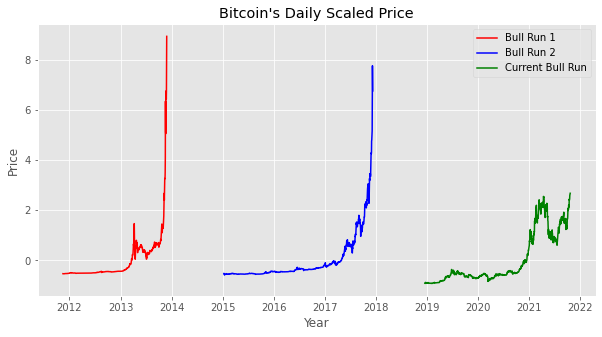

In [33]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = bull1, 
             x = 'date', 
             y = 'scaledprice',
             color = 'red')
sns.lineplot(data = bull2, 
             x = 'date', 
             y = 'scaledprice',
             color = 'blue')
sns.lineplot(data = bull3, 
             x = 'date', 
             y = 'scaledprice',
             color = 'green')
plt.legend(labels = ['Bull Run 1','Bull Run 2','Current Bull Run'])
plt.ylabel('Price')
plt.xlabel('Year')
plt.title("Bitcoin's Daily Scaled Price")
plt.show()

#### 8. `(10 points)` Assuming that history rhymes/repeats with itself, it seems that the current bullmarket (third) is not over yet. In order to approximate the peak of the 3rd bullmarket, execute the following steps:

-  Find the peak prices of bitcoin (highest) during the first and second bullmarket(`peak1_scaled` and `peak2_scaled`). 

-  Assuming that the peak of the third bullmarket (current) will be equal to the average of the two previous peaks computed in the previous step, find the scaled peak of the current bitcoin bullmarket (`peak3_scaled`).

-  Use the following equation to transform the scaled third peak found in the previous part to compute the peak's value in US Dollars (non scaled). 

$price = mean(price) + std(price) \times scaled(price)$

In [34]:
#(a) peak1 and peak2 scaled
peak1_scaled = bull1['scaledprice'].max()
peak2_scaled = bull2['scaledprice'].max()

#(b) peak3 scaled
peak3_scaled = (peak1_scaled+peak2_scaled)/2

#(c) peak3 in USD
peak3_usd = bull3['price'].mean() + bull3['price'].std()*peak3_scaled
print(f'Approximate Peak of 3rd Bull Market Run: ${round(peak3_usd,2)}')

Approximate Peak of 3rd Bull Market Run: $163989.48
